# Recognition of a cat with a Neural Network

This is my second Neural network implemented from scratch, using numpy for vectorizing the calculus.

Actually, my first one was a Deep Feed Forward Neural Network built to recognize a hand-writtend digits, written in both C++ and java.

In this Notebook, we'll come back on the basis, doing a Logistic Regression with a Neural Network. It won't have the best results for sophisticated images but with a model as simple as this, the result are quite impressive.
The Neural Network will look like this:

<img src="images/NN.png" style="height:400px;">

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$\mathcal{L}(\hat{y}^{(i)}, y^{(i)}) =  - y^{(i)}  \log(\hat{y}^{(i)}) - (1-y^{(i)} )  \log(1-\hat{y}^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$

## What to do?

Run all the cells to train the model and generate the outputs in your kernel.

If you want to see the results with different image, re-rerun the last cell of this notebook (you can press "Ctrl + Enter" after clicking on the cell to run this one only).

## Organization of this Notebook 
    1. Packages
    2. Load and prepare the dataset for the training
    3. Sigmoid and Initialization
    4. Forward and backward propagation: compute the gradient 
    5. Predict & Train methods
    6. Model construction
    7. Try the model decision

## 1 - Packages ##

- [numpy](www.numpy.org): the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org): a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org): a famous library to plot graphs in Python.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from py_utils import load_dataset # Copy/pasted loader

%matplotlib inline

## 2 - Load and prepare the dataset for the training ##

In [2]:
training_imgLoaded, training_label, testing_imgLoaded, testing_label, classes = load_dataset()

And here, we reshape and normalize the images to have a $(height*width*3 \text{ x } 1)$ matrix with pixels values between $0$ and $1$.

In [3]:
training_img = training_imgLoaded.reshape(training_imgLoaded.shape[0], -1).T / 255.
testing_img = testing_imgLoaded.reshape(testing_imgLoaded.shape[0], -1).T / 255.

## 3 - Sigmoid and initialization ##

 The sigmoid defined as $sigmoid(Z) = \frac{1}{1 + e^{-(Z)}}$ and will be use as $sigmoid( W^T X + b) = \frac{1}{1 + e^{-(W^T X + b)}}$ to make predictions.
 
 Therefore, we initialize $W$ as a vector of zeros and $b$ as 0

In [4]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def initialize(size):
    W = np.zeros((size, 1))
    b = 0
    return W, b

## 4 - Forward and backward propagation: compute the gradient ##

Forward Propagation:
$$\hat{Y} = \sigma(W^T X + b) = (\hat{y}^{(1)}, \hat{y}^{(2)}, ..., \hat{y}^{(m)})\tag{5}$$

Backward Propagation:
$$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})\log(1-\hat{y}^{(i)}\tag{6})$$
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(\hat{Y}-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})\tag{8}$$

In [5]:
def cost(Yhat, Y):
    cost = -np.sum(Y * np.log(Yhat) + (1 - Y) * np.log(1 - Yhat)) / Y.shape[1]
    return cost

In [6]:
def computeGradient(X, Yhat, Y):
    # Backward
    dW = np.dot(X, (Yhat - Y).T) / X.shape[1]
    db = np.sum(Yhat - Y) / X.shape[1]
    
    return dW, db

## 5 - Predict & Train methods ##

The goal is to learn $w$ and $b$ by minimizing the cost function $J$:
$$W = W - \alpha \text{ } \frac{\partial J}{\partial W}\tag{9}$$

$$b = b - \alpha \text{ } \frac{\partial J}{\partial b}\tag{10}$$
where $\alpha$ is the learning rate.

As for the prediction:
$$Y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } \hat{Y}^{(i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{18}$$

In [7]:
def predict(W, b, X, decisionTreshold = 0.5):
    # Compute the activation value
    Yhat = sigmoid(np.dot(W.T, X) + b)
    
    # Return labels
    P = (Yhat > decisionTreshold)
    
    return P

In [8]:
def train(W, b, X, Y, iteration, learning_rate, print_cost):
    
    costs = []
    
    for i in range(iteration):
         # Compute the activation value
        Yhat = sigmoid(np.dot(W.T, X) + b)
        
        # Compute the epoch_cost
        epoch_cost = cost(Yhat, Y)
        
        if print_cost:
            if i % 100 == 0:
                print("Cost after iteration %i: %f" %(i, epoch_cost))
            if i % 5:
                costs.append(epoch_cost)
        
        # Compute forward and backward propagation
        dW, db = computeGradient(X, Yhat, Y)
        
        # Update de weights and the bias
        W = W - dW * learning_rate
        b = b - db * learning_rate
    
    if print_cost:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate = " + str(learning_rate))
        plt.show()
        
    return W, b

## 6 - Model construction ##

In [9]:
def model(X_train, Y_train, X_test, Y_test, iteration = 4000, learning_rate = 0.003, print_cost = False):
    # Initialize the weights and the bias
    W, b = initialize(X_train.shape[0])

    # Train the model
    W, b = train(W, b, X_train, Y_train, iteration, learning_rate, print_cost)
    
    # Test the model
    Y_prediction_train = predict(W, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    
    Y_prediction_test = predict(W, b, X_test)
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    return W, b

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.528900
Cost after iteration 200: 0.471049
Cost after iteration 300: 0.429731
Cost after iteration 400: 0.397224
Cost after iteration 500: 0.370429
Cost after iteration 600: 0.347699
Cost after iteration 700: 0.328026
Cost after iteration 800: 0.310743
Cost after iteration 900: 0.295380
Cost after iteration 1000: 0.281596
Cost after iteration 1100: 0.269131
Cost after iteration 1200: 0.257785
Cost after iteration 1300: 0.247398
Cost after iteration 1400: 0.237844
Cost after iteration 1500: 0.229019
Cost after iteration 1600: 0.220835
Cost after iteration 1700: 0.213220
Cost after iteration 1800: 0.206114
Cost after iteration 1900: 0.199465
Cost after iteration 2000: 0.193227
Cost after iteration 2100: 0.187362
Cost after iteration 2200: 0.181836
Cost after iteration 2300: 0.176620
Cost after iteration 2400: 0.171687
Cost after iteration 2500: 0.167015
Cost after iteration 2600: 0.162583
Cost after iteration 2700: 0.158373
Cost

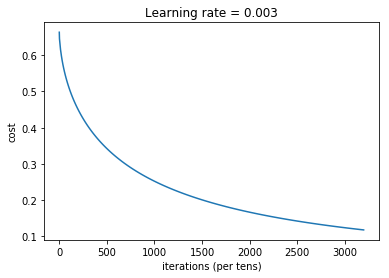

train accuracy: 99.52153110047847 %
test accuracy: 68.0 %


In [10]:
W, b = model(training_img, training_label, testing_img, testing_label, print_cost = True)

In [15]:
def saveParameters(W, b):
    path = "parameters/"
    if not os.path.exists(path):
        os.mkdir(path)
    
    np.save(path + 'W', W)
    np.save(path + 'b', b)

In [18]:
saveParameters(W, b)

## 7. Try the model decision ##

Randomly pick 15 images in the dataset and display the image with the predicted classification.

In [13]:
def try_decision(W, b, X):

    prediction = predict(W, b, X.reshape(X.shape[0], -1).T / 255.)
    indexes = np.random.randint(prediction.shape[1], size = 15)
    
    plt.figure(figsize=(20, 32))
    for i, index in enumerate(indexes):
        plt.subplot(6, 3, i+1)
        
        if (prediction[0][index]):
            plt.title("YES: Cat picture.")
        else:
            plt.title("NO: Non-cat picture.")
        plt.imshow(X[index])

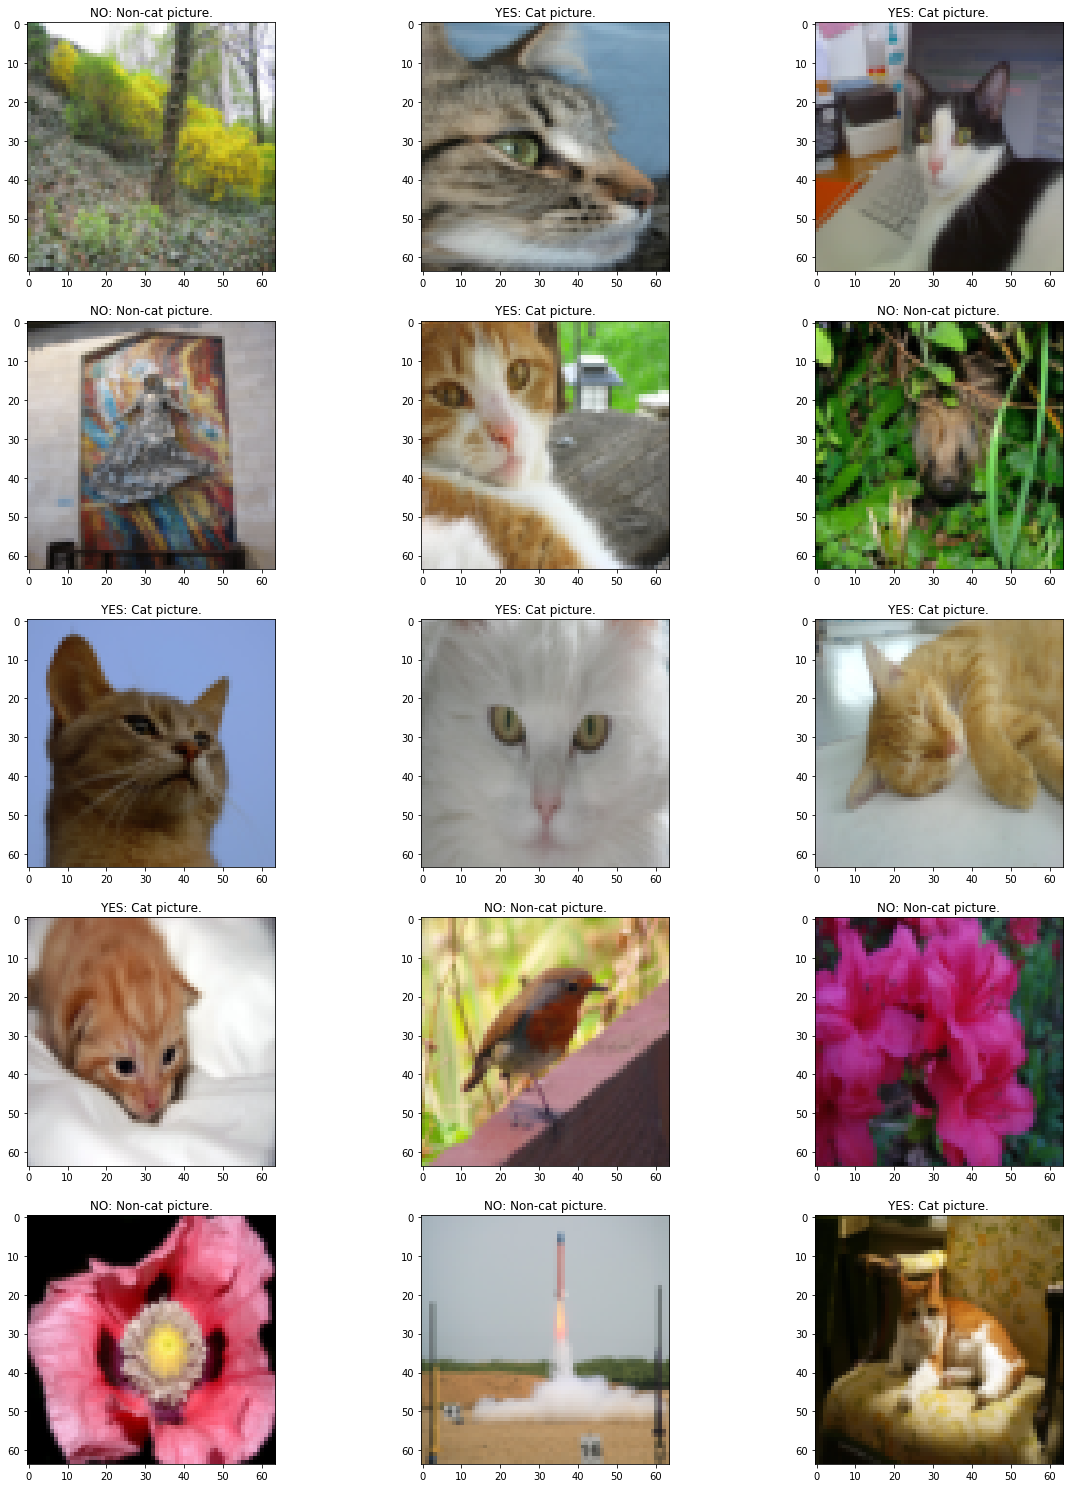

In [14]:
try_decision(W, b, training_imgLoaded)